# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

While there have been many adopters of the SATs, the ACT still maintains a large chunk of the target market. How can we take effective actionable steps toward having a higher SAT participation rate.

## Executive Summary

This project was targetted at creating actionable data from statistics gathered from the SAT & ACT during the years 2017-2018. The population in the datasets are a percentage based population of students from each state that have taken the exams.
Within the dataset, variables were targetted and explored for potential relationships. Notably between participation rates between both tests, as well as the effect of participation rates on scores.

Through external research for supplementary purposes, key findings were that legislature drove most of the changes within the data, and that further effective steps in order to increase SAT foothold on the market.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import math as math

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [4]:
#Code:
sat_17 = pd.read_csv('data/sat_2017.csv')
act_17 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
#Code:
print (sat_17.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

In [6]:
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
print (act_17.head(10))

                  State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2  


In [8]:
act_17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

sat17
- 5 columns 
- 50 rows 
- 'Participation' is an object data type
- Other columns are int

act17
- 7 columns
- 50 rows
- 'Participation' is an object data type
- 'Composite' is an object data type (although it is a column of numbers)
- Other columns are floats

#### 4a. Does the data look complete? 

In [9]:
act_17.isnull().any()

State            False
Participation    False
English          False
Math             False
Reading          False
Science          False
Composite        False
dtype: bool

In [10]:
sat_17.isnull().any()

State                                 False
Participation                         False
Evidence-Based Reading and Writing    False
Math                                  False
Total                                 False
dtype: bool

Answer: The data looks complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Minimum:
    SAT = 400 
    SAT Subtest = 200
    ACT test = 1
    ACT Subtest = 1

Maximum: 
SAT = 1600
SAT Subtest = 800
ACT = 36
ACT Subtest = 36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

Data Errors Found:
- Sat_17 Maryland Math should be 520
- Act_17 Maryland Science should be 23.2

In [11]:
act_17['Science'][21] = 23.2
sat_17['Math'][20] = 520

<ipython-input-11-813f1d229613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_17['Science'][21] = 23.2
<ipython-input-11-813f1d229613>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_17['Math'][20] = 520


In [12]:
sat_17

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [13]:
act_17

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [14]:
#code
act_17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [15]:
sat_17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
- All columns tend to hold numbers, therefore should not be an object-type for comparison
- Participation rates should be data type float
- Composite should convert to float. 


#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [16]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [17]:
#code
def change_type(part):
        part = part.replace('%','')
        return float(part)
    

In [18]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [19]:
sat_17['Participation']=sat_17['Participation'].map(change_type)

In [20]:
sat_17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [21]:
act_17['Participation']=act_17['Participation'].map(change_type)

In [22]:
#act_17['Composite']=act_17['Composite'].astype(float)
#ValueError could not convert string to float: '20.2x'

- Fix any individual values preventing other columns from being the appropriate type.

`Act_17 Composite has score of 20.2x which stops conversion to float`

In [23]:
#remove x from wyoming
act_17['Composite'][51] = 20.2

<ipython-input-23-d3f45d47f640>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_17['Composite'][51] = 20.2


In [24]:
act_17['Composite'].tail()

47    23.8
48    21.9
49    20.4
50    20.5
51    20.2
Name: Composite, dtype: object

In [25]:
act_17['Composite']=act_17['Composite'].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
act_17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [27]:
sat_17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [28]:
act_17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [29]:
#code
sat_17 = sat_17.rename(columns = {
    'State' : 'state',
    'Participation' : 'sat17_participation',
    'Evidence-Based Reading and Writing' : 'sat17_ebrw',
    'Math' : 'sat17_math',
    'Total' : 'sat17_total'
})


In [30]:
act_17 = act_17.rename(columns = {
    'State' : 'state',
    'Participation' : 'act17_participation',
    'English' : 'act17_eng',
    'Math' : 'act17_math',
    'Reading' : 'act17_reading',
    'Science' : 'act17_science',
    'Composite' : 'act17_composite'
})


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|Min|Max|
|---|---|---|---|---|---|
Column Name|int/float/object|ACT/SAT|Description of each column|-|-|
|sat17_participation|float|SAT|Percentage of Student Senior Population tested| 0 | 100|
|sat17_ebrw|int|SAT|Avg SAT Subtest (Evidence-Based Reading and Writing) score for each state|200|800|
|sat17_math|int|SAT|Avg SAT Subtest (Math) score for each state|200|800|
|sat17_total|int|SAT|Avg Total SAT Test score for each state |400|1600
|act17_participation|float|ACT|Percentage of Student Senior Population tested| 0 | 100|
|act17_english|float|ACT|Avg ACT English score for each state  |1|36|
|act17_math|float|ACT|Avg ACT Math score for each state |1|36|
|act17_reading|float|ACT|Avg ACT Reading score for each state |1|36|
|act17_science|float|ACT|Avg ACT Science score for each state |1|36|
|act17composite|float|ACT|Avg ACT Composite score max. for each state|1|36|




#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [31]:
act_17.head()

,state,act17_participation,act17_eng,act17_math,act17_reading,act17_science,act17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [32]:
#Remove act_17 National Row
act_17 = act_17.drop(0)

In [33]:
act_17.head()

,state,act17_participation,act17_eng,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [34]:
#Code:
actsat_17 = pd.merge(sat_17, act_17, on='state', how='outer')

In [35]:
actsat_17.head()

,state,sat17_participation,sat17_ebrw,sat17_math,sat17_total,act17_participation,act17_eng,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [36]:
#code
actsat_17.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [39]:
#ImportingFiles
sat_18 = pd.read_csv('data/sat_2018.csv')
act_18 = pd.read_csv('data/act_2018_updated.csv')

In [40]:
sat_18.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [41]:
sat_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [42]:
#Remove % from participation
sat_18['Participation']=sat_18['Participation'].map(change_type)

In [43]:
act_18.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [44]:
act_18.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [45]:
#Convert sat_18/act_18 'Participation' column to float
sat_18['Participation']=sat_18['Participation'].astype(float)
act_18['Percentage of Students Tested']=act_18['Percentage of Students Tested'].astype(float)

In [46]:
act_18.dtypes

State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [47]:
sat_18.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [48]:
sat_18 = sat_18.rename(columns = {
    'State' : 'state',
    'Participation' : 'sat18_participation',
    'Evidence-Based Reading and Writing' : 'sat18_ebrw',
    'Math' : 'sat18_math',
    'Total' : 'sat18_total'
})


In [49]:
sat_18.head()

,state,sat18_participation,sat18_ebrw,sat18_math,sat18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [50]:
act_18 = act_18.rename(columns = {
    'State' : 'state',
    'Percentage of Students Tested' : 'act18_participation',
    'Average Composite Score' : 'act18_composite',
    'Average English Score' : 'act18_eng',
    'Average Math Score' : 'act18_math',
    'Average Reading Score' : 'act18_reading',
    'Average Science Score' : 'act18_science',
})

In [51]:
act_18.head()

,state,act18_participation,act18_composite,act18_eng,act18_math,act18_reading,act18_science
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [52]:
actsat_18 = pd.merge(sat_18, act_18, on='state', how='outer')
final = pd.merge(actsat_17, actsat_18, on='state', how='outer')

In [53]:
final.head()

,state,sat17_participation,sat17_ebrw,sat17_math,sat17_total,act17_participation,act17_eng,act17_math,act17_reading,act17_science,...,sat18_participation,sat18_ebrw,sat18_math,sat18_total,act18_participation,act18_composite,act18_eng,act18_math,act18_reading,act18_science
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


In [54]:
final.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [55]:
final.describe().transpose

<bound method DataFrame.transpose of        sat17_participation  sat17_ebrw  sat17_math  sat17_total  \
count            51.000000   51.000000   51.000000    51.000000   
mean             39.803922  569.117647  556.803922  1126.098039   
std              35.276632   45.666901   47.180513    92.494812   
min               2.000000  482.000000  468.000000   950.000000   
25%               4.000000  533.500000  522.000000  1055.500000   
50%              38.000000  559.000000  548.000000  1107.000000   
75%              66.000000  613.000000  599.000000  1212.000000   
max             100.000000  644.000000  651.000000  1295.000000   

       act17_participation  act17_eng  act17_math  act17_reading  \
count            51.000000  51.000000   51.000000      51.000000   
mean             65.254902  20.931373   21.182353      22.013725   
std              32.140842   2.353677    1.981989       2.067271   
min               8.000000  16.300000   18.000000      18.100000   
25%              31

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [56]:
def sd_func(series):
    #find mean
    series_mean = sum(series)/len(series)
    series_count = 0 
    for i in series:
    #for each item in series, add to count
        series_count += (i-series_mean)**2
    return (series_count/len(series))**0.5
    
    
    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [57]:
#Set 
col_list = list((final.columns)[1:])
sd_list = [sd_func(final[i]) for i in col_list]

In [58]:
sd = {key: value for key, value in zip(col_list, sd_list)}
sd

{'sat17_participation': 34.92907076664508,
 'sat17_ebrw': 45.21697020437866,
 'sat17_math': 46.71566878587415,
 'sat17_total': 91.58351056778743,
 'act17_participation': 31.824175751231806,
 'act17_eng': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7222161451443676,
 'act17_composite': 2.000786081581989,
 'sat18_participation': 36.946619223539415,
 'sat18_ebrw': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433,
 'act18_participation': 33.745194881997506,
 'act18_composite': 2.0855261815801147,
 'act18_eng': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_science': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [59]:
sd_func(final.sat17_ebrw), np.std(final.sat17_ebrw)

(45.21697020437866, 45.21697020437866)

Answer: It does not match numpy's std method as it did not account for degrees of freedom.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [60]:
#Set State as Index
final.set_index('state', inplace=True)

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [61]:
def h_l_score(i,v):
    h = i.sort_values(ascending=False).head(v)
    l = i.sort_values(ascending=False).tail(v)
    print(f'High Score\n{h} \nBottom Score \n{l}')

In [62]:
h_l_score(final['sat17_participation'],8)

High Score
state
Connecticut             100.0
Delaware                100.0
District of Columbia    100.0
Michigan                100.0
New Hampshire            96.0
Maine                    95.0
Idaho                    93.0
Florida                  83.0
Name: sat17_participation, dtype: float64 
Bottom Score 
state
Wisconsin       3.0
Nebraska        3.0
South Dakota    3.0
Utah            3.0
Missouri        3.0
Iowa            2.0
Mississippi     2.0
North Dakota    2.0
Name: sat17_participation, dtype: float64


`SAT 2017 Highest & Lowest Participation Rates`
- Highest : Connecticut, Delaware, District of Columbia & Michigan
- Lowest : Iowa, Mississippi & North Dakota	

In [63]:
h_l_score(final['sat18_participation'],6)

High Score
state
Idaho          100.0
Michigan       100.0
Delaware       100.0
Connecticut    100.0
Colorado       100.0
Illinois        99.0
Name: sat18_participation, dtype: float64 
Bottom Score 
state
Mississippi     3.0
Wisconsin       3.0
Nebraska        3.0
South Dakota    3.0
Wyoming         3.0
North Dakota    2.0
Name: sat18_participation, dtype: float64


`SAT 2018 Highest & Lowest Participation Rates`
- Highest : Idaho, Michigan, Delaware, Connecticut & Colorado
- Lowest : North Dakota	

In [64]:
h_l_score(final['act17_participation'],18)

High Score
state
Wyoming           100.0
Oklahoma          100.0
Arkansas          100.0
Colorado          100.0
Kentucky          100.0
Louisiana         100.0
Minnesota         100.0
Mississippi       100.0
Wisconsin         100.0
Montana           100.0
Nevada            100.0
North Carolina    100.0
Missouri          100.0
Alabama           100.0
Tennessee         100.0
Utah              100.0
South Carolina    100.0
North Dakota       98.0
Name: act17_participation, dtype: float64 
Bottom Score 
state
Idaho                   38.0
Indiana                 35.0
New Jersey              34.0
District of Columbia    32.0
Connecticut             31.0
New York                31.0
California              31.0
Washington              29.0
Virginia                29.0
Michigan                29.0
Massachusetts           29.0
Vermont                 29.0
Maryland                28.0
Pennsylvania            23.0
Rhode Island            21.0
Delaware                18.0
New Hampshire           

`ACT 2017 Highest & Lowest Participation Rates`
- Highest : Wyoming, Oklahoma, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Wisconsin, Montana, Nevada, North Carolina, Missouri, Alabama, Tennessee, Utah & South Carolina
- Lowest : Maine



In [65]:
h_l_score(final['act18_participation'],18)

High Score
state
Wyoming           100.0
Oklahoma          100.0
Arkansas          100.0
Kentucky          100.0
Louisiana         100.0
Mississippi       100.0
Wisconsin         100.0
Montana           100.0
Nebraska          100.0
Nevada            100.0
North Carolina    100.0
Ohio              100.0
Missouri          100.0
Alabama           100.0
South Carolina    100.0
Tennessee         100.0
Utah              100.0
Minnesota          99.0
Name: act18_participation, dtype: float64 
Bottom Score 
state
District of Columbia    32.0
Indiana                 32.0
Maryland                31.0
New Jersey              31.0
Colorado                30.0
New York                27.0
California              27.0
Connecticut             26.0
Massachusetts           25.0
Virginia                24.0
Vermont                 24.0
Washington              24.0
Michigan                22.0
Pennsylvania            20.0
Delaware                17.0
New Hampshire           16.0
Rhode Island            

`ACT 2018 Highest & Lowest Participation Rates`
- Highest : Wyoming, Oklahoma, Arkansas, Kentucky, Louisiana, Mississippi, Wisconsin, Montana, Nebraska, Nevada,
North Carolina, Ohio, Missouri, Alabama, South Carolina, Tennessee & Utah    
- Lowest : Maine

- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [66]:
h_l_score(final['sat17_total'],5)

High Score
state
Minnesota    1295
Wisconsin    1291
Iowa         1275
Missouri     1271
Kansas       1260
Name: sat17_total, dtype: int64 
Bottom Score 
state
Maine                   1012
Michigan                1005
Idaho                   1005
Delaware                 996
District of Columbia     950
Name: sat17_total, dtype: int64


`SAT 2017 Highest & Lowest Total Score`
- Highest : Minnesota  
- Lowest : District of Columbia

In [67]:
h_l_score(final['sat18_total'],3)

High Score
state
Minnesota       1298
Wisconsin       1294
North Dakota    1283
Name: sat18_total, dtype: int64 
Bottom Score 
state
West Virginia           999
Delaware                998
District of Columbia    977
Name: sat18_total, dtype: int64


`SAT 2018 Highest & Lowest Total Score`
- Highest : Minnesota
- Lowest : District of Columbia

In [68]:
h_l_score(final['act17_composite'],3)

High Score
state
New Hampshire    25.5
Massachusetts    25.4
Connecticut      25.2
Name: act17_composite, dtype: float64 
Bottom Score 
state
South Carolina    18.7
Mississippi       18.6
Nevada            17.8
Name: act17_composite, dtype: float64


`ACT 2017 Highest & Lowest Composite Score`
- Highest : New Hampshire
- Lowest : Nevada

In [69]:
h_l_score(final['act18_composite'],3)

High Score
state
Connecticut      25.6
Massachusetts    25.5
New Hampshire    25.1
Name: act18_composite, dtype: float64 
Bottom Score 
state
Mississippi       18.6
South Carolina    18.3
Nevada            17.7
Name: act18_composite, dtype: float64


`ACT 2018 Highest & Lowest Composite Score`
- Highest : Connecticut
- Lowest : Nevada

Do any states with 100% participation on a given test have a rate change year-to-year?

In [70]:
#Create function to calculate Rate of Change
def rate_of_change(series_17, series_18):
    roc = (series_18 - series_17) / series_17
    return roc.round(3)

In [71]:
#Create Mask of SAT17/ SAT18 with 100% Participation
sat_fullpart = final[(final.sat17_participation == 100.0) | (final.sat18_participation == 100.0)]
sat_fullpart = sat_fullpart[['sat17_participation', 'sat18_participation']]
sat_fullpart

,sat17_participation,sat18_participation
state,,
Colorado,11.0,100.0
Connecticut,100.0,100.0
Delaware,100.0,100.0
District of Columbia,100.0,92.0
Idaho,93.0,100.0
Michigan,100.0,100.0


In [72]:
#Apply function to determine rate of change / Masking results with no change
sat_roc = rate_of_change(sat_fullpart['sat17_participation'],sat_fullpart['sat18_participation'])
sat_roc[sat_roc!=0]

state
Colorado                8.091
District of Columbia   -0.080
Idaho                   0.075
dtype: float64

`SAT 2017-2018 Rate of Change`
- Colorado, District of Columbia & Idaho
- Notably Colorado experienced a drastic increase of participants from 2017-2018 (8.091 Rate of Change)

In [73]:
#Create Mask of ACT17/ ACT18 with 100% Participation
act_fullpart = final[(final.act17_participation == 100.0) | (final.act18_participation == 100.0)]
act_fullpart = act_fullpart[['act17_participation', 'act18_participation']]
act_fullpart

,act17_participation,act18_participation
state,,
Alabama,100.0,100.0
Arkansas,100.0,100.0
Colorado,100.0,30.0
Kentucky,100.0,100.0
Louisiana,100.0,100.0
Minnesota,100.0,99.0
Mississippi,100.0,100.0
Missouri,100.0,100.0
Montana,100.0,100.0


In [74]:
act_roc = rate_of_change(act_fullpart['act17_participation'],act_fullpart['act18_participation'])
act_roc[act_roc!=0]

state
Colorado    -0.700
Minnesota   -0.010
Nebraska     0.190
Ohio         0.333
dtype: float64

`ACT 2017-2018 Rate of Change`
- Nebraska, Ohio, Minnesota & Colorado
- Nebraska & Ohio experienced notable positive rate of change (>0.10) from 2017 - 2018
- Colorado experienced a drastic drop, this could be related to colorado's increase in SAT takers from 2017-2018

Do any states show have >50% participation on both tests either year?

`2017`
 - Florida, Georgia, Hawaii & South Carolina

`2018`
 - Florida, Georgia, Hawaii, South Carolina & North Carolina

In [75]:
#Filter sat17 & act17 for over 50% participation
half_part17 = final[(final.sat17_participation >= 50) & (final.act17_participation >= 50)]
half_part17[['sat17_participation', 'act17_participation']]

,sat17_participation,act17_participation
state,,
Florida,83.0,73.0
Georgia,61.0,55.0
Hawaii,55.0,90.0
South Carolina,50.0,100.0


`2017`
 - Florida, Georgia, Hawaii & South Carolina

In [76]:
#Filter sat18 & act18 for over 50% participation
half_part18 = final[(final.sat18_participation >= 50) & (final.act18_participation >= 50)]
half_part18[['sat18_participation', 'act18_participation']]

,sat18_participation,act18_participation
state,,
Florida,56.0,66.0
Georgia,70.0,53.0
Hawaii,56.0,89.0
North Carolina,52.0,100.0
South Carolina,55.0,100.0


`2018`
 - Florida, Georgia, Hawaii, South Carolina & North Carolina

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

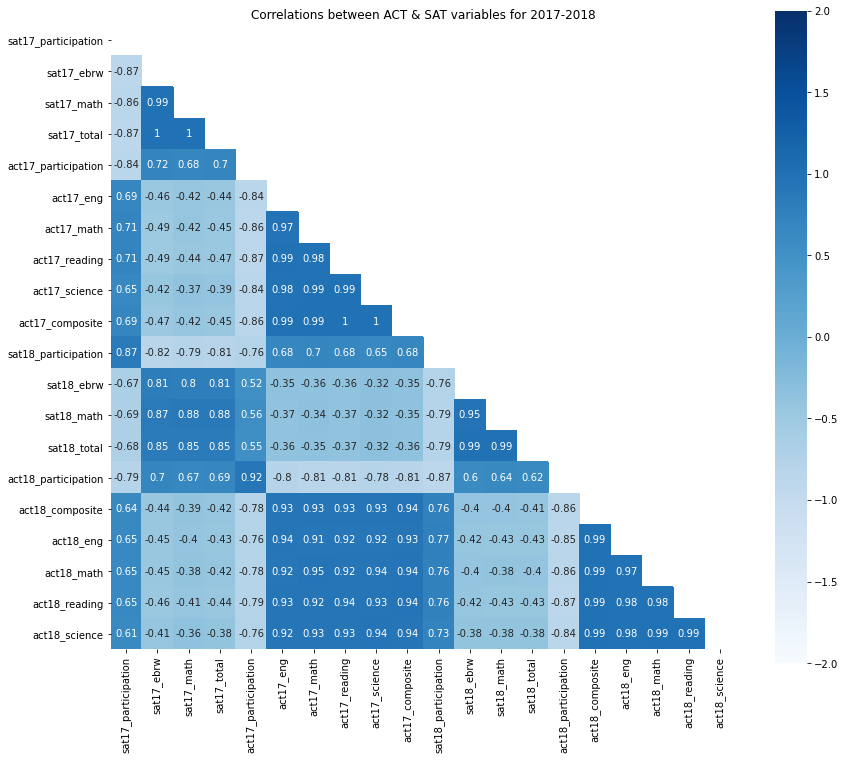

In [77]:
plt.figure(figsize=(14,12))
corr = final.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white
sns.heatmap(corr, mask = mask, vmin=-2,vmax=2, square=True, annot=True, cmap='Blues')
plt.title('Correlations between ACT & SAT variables for 2017-2018');

`Observations`
- It is very notable that there seems to be a strong negative correlation between participation & scores for both the tests. 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [78]:
# create histogram function
def subplot_histograms(dataframe, list_of_columns, list_of_titles, xlabel):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel() 
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins =10)
        ax[i].axvline(dataframe[column].median(), color='red', linestyle='dashed')
        
    #Titles, labels    
    for i, ax in enumerate(ax):
        ax.set_title(f'{(list_of_titles[i])}')
        ax.set_xlabel(f'{xlabel}')
        ax.set_ylabel('States')


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [79]:
#List_of_Columns
participation = ['sat17_participation','sat18_participation','act17_participation','act18_participation']
math = ['sat17_math','sat18_math','act17_math','act18_math']
read_verbal = ['sat17_ebrw','sat18_ebrw','act17_reading','act18_reading']

#List_of_Titles
participation_titles = ['SAT 2017 Participation Rate','SAT 2018 Participation Rate','ACT 2017 Participation Rate','ACT 2018 Participation Rate']
math_titles = ['SAT 17 Math','SAT 18 Math','ACT 17 Math','ACT 18 Math']
read_verbal_titles = ['SAT 2017 Evidence-Based Reading & Writing','SAT 2018 Evidence-Based Reading & Writing','ACT 2017 Reading','ACT 2018 Reading']

#xlabels
participation_xlabels = 'Percentage of Participation'
math_xlabels = 'Math'
read_verbal_xlabels = 'Reading/Verbal Scores'

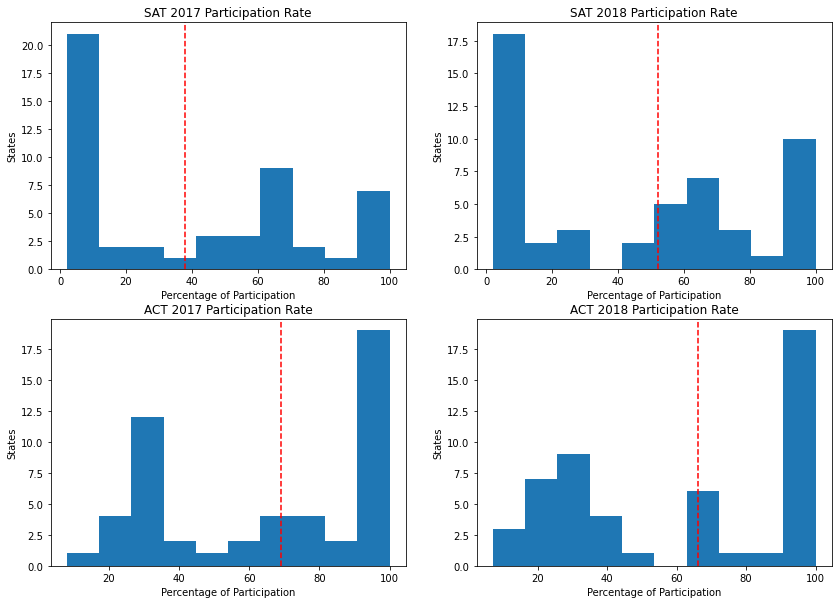

In [80]:
#Plot Histogram for SAT Participation Rate
subplot_histograms(final, participation, participation_titles, participation_xlabels);

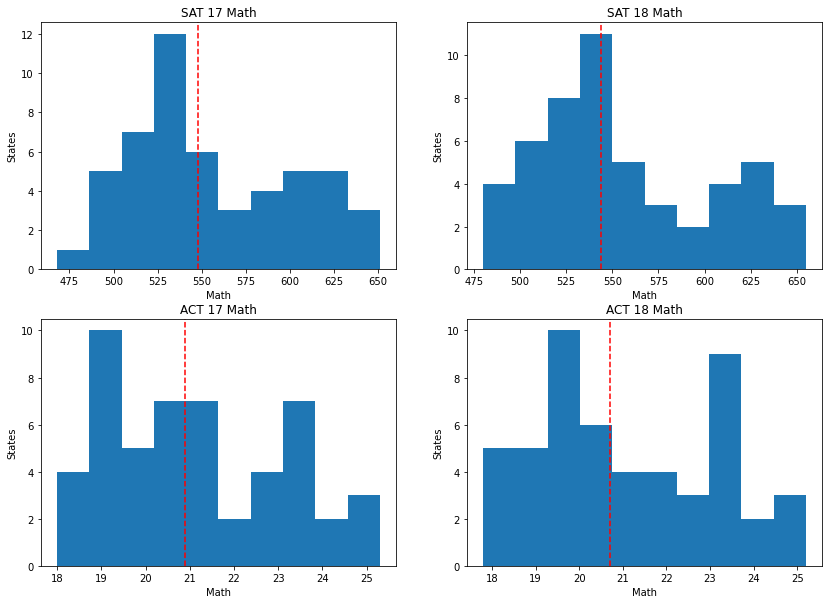

In [81]:
#Plot Histogram for Math Scores
subplot_histograms(final, math, math_titles, math_xlabels);

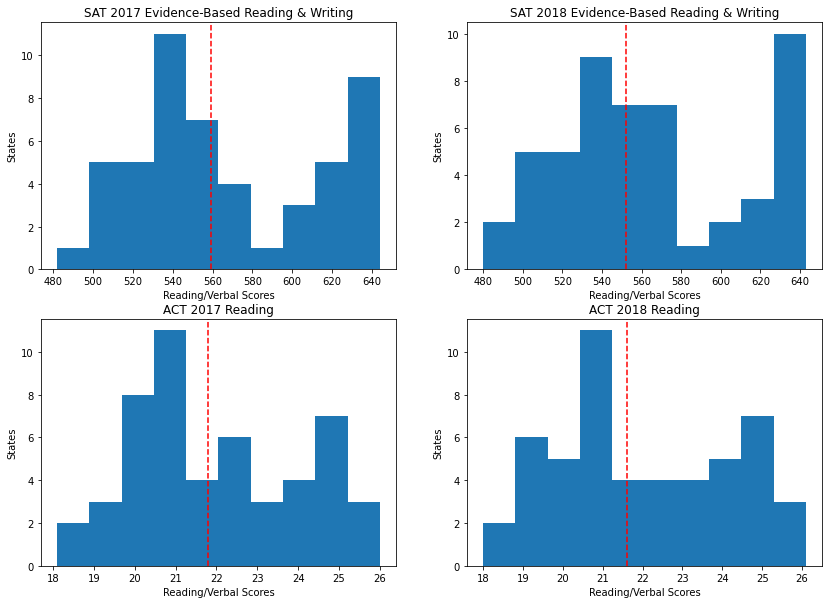

In [82]:
#Plot Histogram for SAT Evidence-Based Reading & Writing, ACT Reading
subplot_histograms(final, read_verbal, read_verbal_titles, read_verbal_xlabels);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


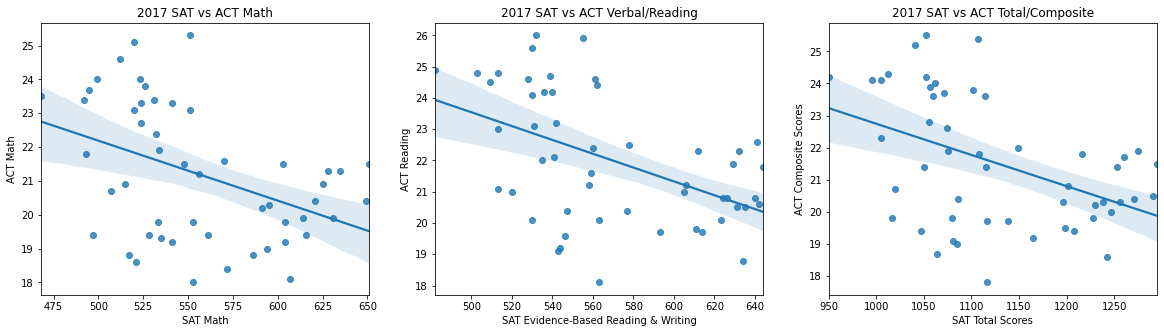

In [83]:
fig = plt.figure(figsize=(20,5))

ax1=fig.add_subplot(1,3,1)
plt.title("2017 SAT vs ACT Math")
sns.regplot(data=final, x='sat17_math', y='act17_math')
plt.xlabel('SAT Math')
plt.ylabel('ACT Math')

ax2=fig.add_subplot(1,3,2)
plt.title("2017 SAT vs ACT Verbal/Reading")
sns.regplot(data=final, x='sat17_ebrw', y='act17_reading')
plt.xlabel('SAT Evidence-Based Reading & Writing')
plt.ylabel('ACT Reading')

ax3 = fig.add_subplot(1,3,3)
plt.title("2017 SAT vs ACT Total/Composite")
sns.regplot(data=final, x='sat17_total', y='act17_composite')
plt.xlabel('SAT Total Scores')
plt.ylabel('ACT Composite Scores');

There is a negative correlation between ACT scores and SAT scores.
This could be due to numerous outside factors however, it could also be related to the different scoring systems for both. 

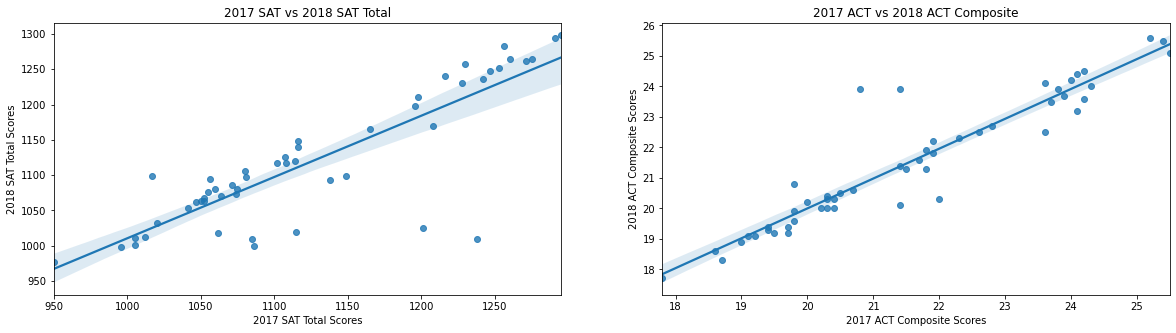

In [84]:
fig = plt.figure(figsize=(20,5))

ax1=fig.add_subplot(1,2,1)
plt.title("2017 SAT vs 2018 SAT Total")
sns.regplot(data=final, x='sat17_total', y='sat18_total')
plt.xlabel('2017 SAT Total Scores')
plt.ylabel('2018 SAT Total Scores')

ax1=fig.add_subplot(1,2,2)
plt.title("2017 ACT vs 2018 ACT Composite")
sns.regplot(data=final, x='act17_composite', y='act18_composite')
plt.xlabel('2017 ACT Composite Scores')
plt.ylabel('2018 ACT Composite Scores');

There seems to be a positive correlation between the SAT scores from both years as well as the ACT scores. 
As they are measured along the same scoring, it makes sense that the scores would match and appear to be correlated since the variables are similar in nature.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [85]:
overall_participation = final.loc[:,['sat17_participation', 'sat18_participation','act17_participation', 'act18_participation']]
overall_participation = overall_participation.rename(columns={
    'sat17_participation' : 'SAT 2017',
    'sat18_participation' : 'SAT 2018',
    'act17_participation' : 'ACT 2017',
    'act18_participation' : 'ACT 2018'
})

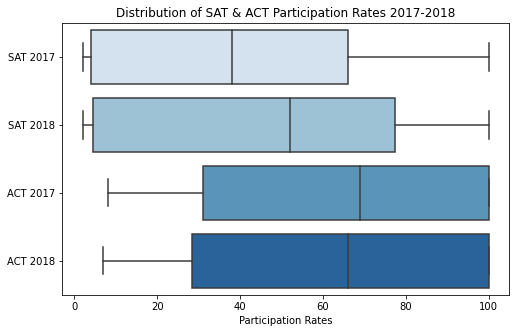

In [86]:
plt.figure(figsize = (8,5))
sns.boxplot(data=overall_participation,orient='h',palette='Blues')
plt.title('Distribution of SAT & ACT Participation Rates 2017-2018');
plt.xlabel('Participation Rates');

- From this boxplot it was easy to see that there was a significant increase in Median participation rate for the SATs from 2017-2018
- Additionally, there was a rather substantial increase in the interquartile range for the SATs, although their 25 percentile did not rise, their 75% percentile increased.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

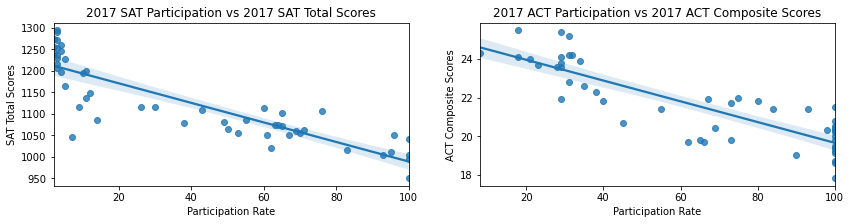

In [87]:
fig = plt.figure(figsize=(14,3))

ax1=fig.add_subplot(1,2,1)
plt.title("2017 SAT Participation vs 2017 SAT Total Scores")
sns.regplot(data=final, x='sat17_participation', y='sat17_total')
plt.xlabel('Participation Rate')
plt.ylabel('SAT Total Scores')

ax1=fig.add_subplot(1,2,2)
plt.title("2017 ACT Participation vs 2017 ACT Composite Scores")
sns.regplot(data=final, x='act17_participation', y='act17_composite')
plt.xlabel('Participation Rate')
plt.ylabel('ACT Composite Scores');

- As we can see, there is a negative correlation between scores overall and participation rates of both tests. 
<br>`SAT`
- For the SAT in particular, there is a large concentration of states that have a low participation rate have a very high score aggregate. 
- This could be due to the SAT being non-mandatory in some places could encourage some more enterprising students to go out of their way to take it as a means of having an edge. These enterprising students would generally already be the type to score higher, and therefore skew the data. 
<br>`ACT`
- For the ACT however, the opposite seems true, where there is a concentration where participation is high, but the scores are low. 
- This could be the fact that in states where it is mandatory to take the ACT (Therefore a 100% participation rate.) the entire population would be taking the test, regardless of readiness or willingless of the participant. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [88]:
final_description = round(final.describe().transpose(),2)
final_description

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.80,35.28,2.0,4.00,38.0,66.00,100.0
sat17_ebrw,51.0,569.12,45.67,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.80,47.18,468.0,522.00,548.0,599.00,651.0
sat17_total,51.0,1126.10,92.49,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation,51.0,65.25,32.14,8.0,31.00,69.0,100.00,100.0
act17_eng,51.0,20.93,2.35,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.18,1.98,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.01,2.07,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.45,1.74,18.2,19.95,21.3,23.20,24.9
act17_composite,51.0,21.52,2.02,17.8,19.80,21.4,23.60,25.5


In [89]:
final_description[:4]

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.80,35.28,2.0,4.0,38.0,66.0,100.0
sat17_ebrw,51.0,569.12,45.67,482.0,533.5,559.0,613.0,644.0
sat17_math,51.0,556.80,47.18,468.0,522.0,548.0,599.0,651.0
sat17_total,51.0,1126.10,92.49,950.0,1055.5,1107.0,1212.0,1295.0


Answer:
- Sat17 Participation: Assumed to be rather evenly distributed as the mean is close to the median 
- Sat17 EBRW: Negatively skewed as the mean is lower than the median 
- Sat17 Math: Assumed to be rather evenly distributed as the mean is close to the median 
- Sat17 Total: Assumed to be rather evenly distributed as the mean is close to the median 

In [90]:
final_description[10:14]

,count,mean,std,min,25%,50%,75%,max
sat18_participation,51.0,45.75,37.31,2.0,4.5,52.0,77.5,100.0
sat18_ebrw,51.0,563.69,47.50,480.0,534.5,552.0,610.5,643.0
sat18_math,51.0,556.24,47.77,480.0,522.5,544.0,593.5,655.0
sat18_total,51.0,1120.02,94.16,977.0,1057.5,1098.0,1204.0,1298.0


- Sat18 Participation: Mean participation has increased with the median being significantly higher 
- Sat18 EBRW: Saw a decrease compared to 2017 
- Sat18 Math: Very simliar to Math scores in SAT2017
- Sat18 Total: The median has seen a slight decrease compared to SAT2017 whereas the mean has increased. The graph would become more negatively skewed

In [91]:
final_description[4:10]

,count,mean,std,min,25%,50%,75%,max
act17_participation,51.0,65.25,32.14,8.0,31.00,69.0,100.00,100.0
act17_eng,51.0,20.93,2.35,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.18,1.98,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.01,2.07,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.45,1.74,18.2,19.95,21.3,23.20,24.9
act17_composite,51.0,21.52,2.02,17.8,19.80,21.4,23.60,25.5


- Act17 Participation: Very positively skewed as the 75% percentile has 100% participation rate
- Act17 English: Mean and median are almost equal which indicates an even distribution
- Act17 Math: Positively skewed (When compared to the other results)
- Act17 Reading: Mean and median are almost equal which indicates an even distribution
- Act17 Science: Mean and median are almost equal which indicates an even distribution
- Act17 Composite: Mean and median are almost equal which indicates an even distribution

In [92]:
final_description[14:]

,count,mean,std,min,25%,50%,75%,max
act18_participation,51.0,61.65,34.08,7.0,28.50,66.0,100.00,100.0
act18_composite,51.0,21.49,2.11,17.7,19.95,21.3,23.55,25.6
act18_eng,51.0,20.99,2.45,16.6,19.10,20.2,23.70,26.0
act18_math,51.0,21.13,2.04,17.8,19.40,20.7,23.15,25.2
act18_reading,51.0,22.02,2.17,18.0,20.45,21.6,24.10,26.1
act18_science,51.0,21.35,1.87,17.9,19.85,21.1,23.05,24.9


Overall, the data from the ACT has not seen much significant change compared to the data of the SAT which has changed quite a bit. 
- Since the data is a large distribution of test results on a population, it would be unlikely to see a significant change in data unless there were external factors at play. 



#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

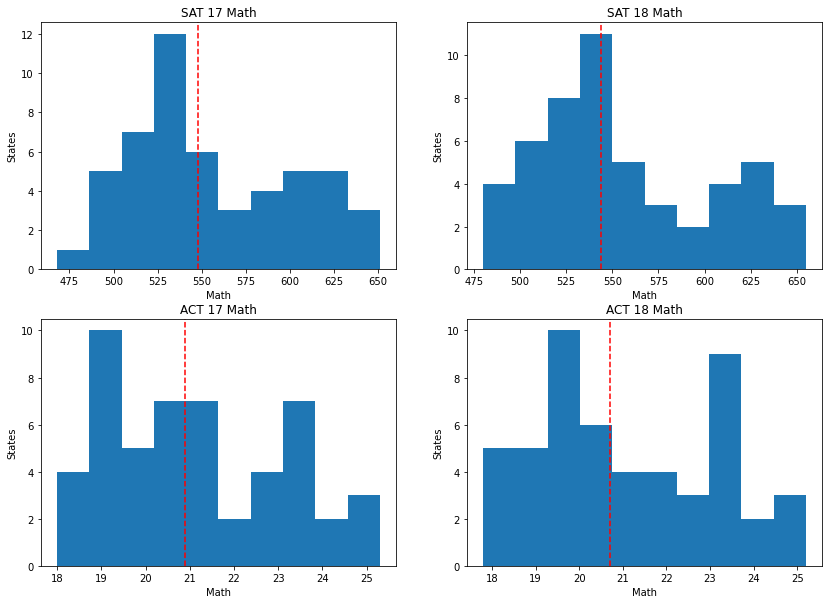

In [93]:
subplot_histograms(final, math, math_titles, math_xlabels);

Answer:

We can see that the distributions of the data tend to be more bi-modal and not normally distributed

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

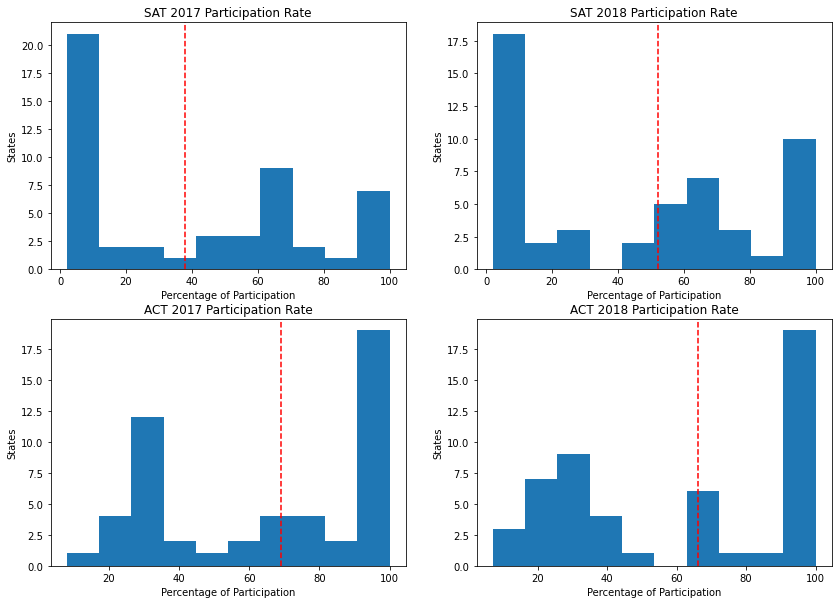

In [94]:
subplot_histograms(final, participation, participation_titles, participation_xlabels);

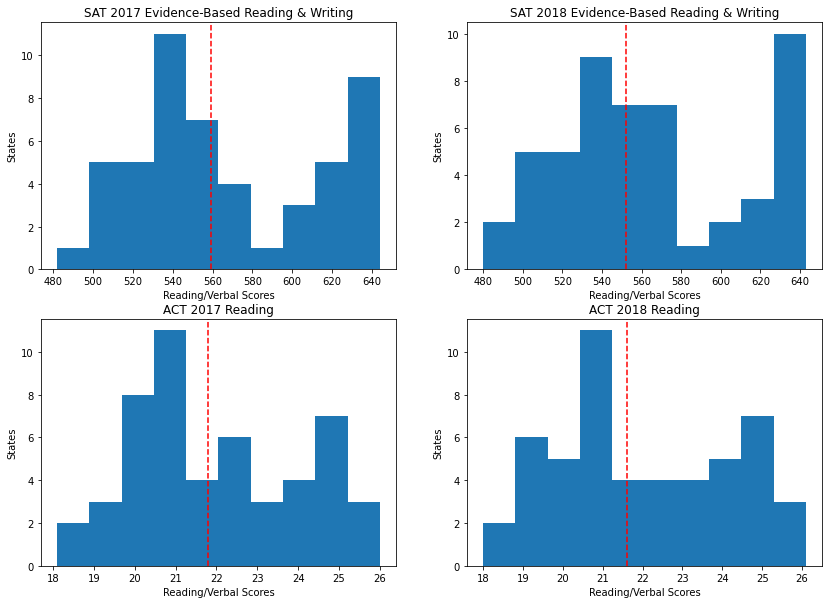

In [95]:
subplot_histograms(final, read_verbal, read_verbal_titles, read_verbal_xlabels);

Answer:
- For all the distributions, we see almost no semblance of a normal distribution. Because there are only 51 samples, we do not have a large enough sample size. Estimates created from this data may not be accurate.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: 

It does not make sense to conduct statistical inference. 
As there are only 51 states, it does not give enough granularity to create meaningful statistical inference. If it was possible to gain insight as to how this data was culmulated into these aggregates, it may be able to then create proper statistical inferences with a larger sampleset.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:
We cannot do this as the scores provided are aggregated and non-comparable. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

It is not appropriate as the data would be inaccurate. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [96]:
sat_roc = rate_of_change(final['sat17_participation'],final['sat18_participation'])
sat_roc = sat_roc[sat_roc!=0]

In [97]:
act_roc = rate_of_change(final['act17_participation'],final['act18_participation'])
act_roc = act_roc[act_roc!=0]
act_roc

state
Alaska          -0.492
Arizona          0.065
California      -0.129
Colorado        -0.700
Connecticut     -0.161
Delaware        -0.056
Florida         -0.096
Georgia         -0.036
Hawaii          -0.011
Idaho           -0.053
Illinois        -0.538
Indiana         -0.086
Iowa             0.015
Kansas          -0.027
Maine           -0.125
Maryland         0.107
Massachusetts   -0.138
Michigan        -0.241
Minnesota       -0.010
Nebraska         0.190
New Hampshire   -0.111
New Jersey      -0.088
New Mexico       0.015
New York        -0.129
Ohio             0.333
Oregon           0.050
Pennsylvania    -0.130
Rhode Island    -0.286
South Dakota    -0.038
Texas           -0.089
Vermont         -0.172
Virginia        -0.172
Washington      -0.172
West Virginia   -0.058
dtype: float64

`Colorado: Experienced the highest rate of change for both the ACTs & the SATs.`
- During 2018, SAT was able to secure a contract that partnered it with the Colorado, this created a wide adoption of the SAT within Colorado pushing participation rates to 100%. This also caused the ACT participation rate to fall 70% from the previous year to 30%.

- Source: https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/

`Illinois: Saw a ten-fold increase on SAT participation rates and a 50% decrease on the ACTs.`
- Like Colorado, the SAT was able to secure another crucial partnership here to create a ten-fold increase in participation rates.(9% in 2017 -> 99% in 2018) Similarly with Colorado, the ACT participation rates in Illinois plummeted by 53%.

- Source: https://chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/

`West Virginia: Saw participation for SAT double while ACT saw a slight decrease.`
- Unlike the drastic changes in Colorado & Illinois, West Virginia experienced a notable yet not as drastic increase in SAT participants. This seems due to West Virginia offering the SAT as an optional but free test. While it may not be as heavy handed as the actions taken in Illinois & Colorado, it gives the SAT a foot-in-the-door in a state that was more ACT based (69% participation rates during ACT2017)

- Source: https://www.wsaz.com/content/news/All-WVa-high-school-juniors-to-begin-taking-SAT-exam-beginning-Spring-2018-444248263.html

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Through the outside research on variables identified through the dataset, it was easy to note that most of the drastic changes toward participation rate tended to be legislative in nature. While actions like giving the test out for free create some foothold, it seems the most effective course of action is through politicians and legislature. To that end, the college board might see best results hiring lobbyists to push for SAT adoption although the action can be seen as heavy handed. 

Additionally, perhaps a reflection of the SAT strategy compared to the ACT, the ACT boasts impressive 100% participation rates over several states, versus the SAT which has a more scattered participation rate. The reason for the ACT's high participation rates have been key contracts which partner states, which mandate taking the ACTs for students within that state. 